In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
# if getting error, please mute the three lines below
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16


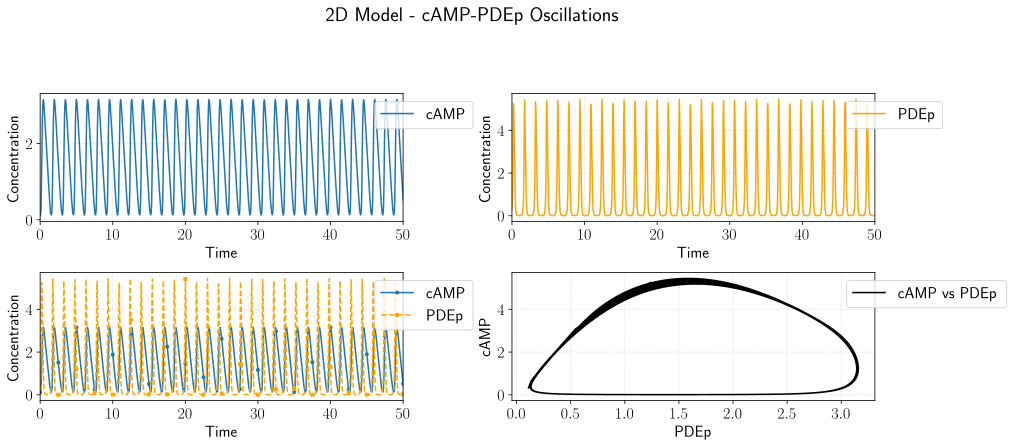

In [4]:
def cAMP_PDEp_ACp(t, x):
    cAMP = x[0]
    PDEp = x[1]

    def G(u, v, J, K): # equation (4)
            numerator = 2 * u * K # numerator of the fraction
            den_1 = v - u + v * J + u * K # first part of the denominator
            den_2 = -4 * (v - u) * u * K # second part of the denominator
            radicand = den_1**2 + den_2 # expression under the square root
            denominator = den_1 + np.sqrt(radicand) # compute the entire denominator
            return numerator / denominator # compute and return the fraction

    ACp = ACt*G(r1*cAMP, r2*Dt, Km1/ACt, Km2/ACt)
    dPDEp  = r3 * cAMP * ((PDEt - PDEp) / Km3) - r4 * Et * PDEp / (Km4 + PDEp)
    dcAMP = (k1*ACp) - (k3 + k2 * PDEp) * cAMP

    return [dcAMP, dPDEp]

# oscillating parameters
k1, k3, k2 = 9.18, 0.12, 10
r1, r2, r3, r4 = 2.04, 9.34, 0.56, 1.84
Km1, Km2, Km3, Km4 = 0.46, 9.34, 1.26, 0.18
Dt, ACt =  1.26, 10
PDEt, Et = 9.66, 2.04

# old parameters
#k1, k3, k2 = 4.22, 9.19, 8.26
#r1, r2, r3, r4 = 5.86, 2.53, 9.48, 8.75
#Km1, Km2, Km3, Km4 = 9.97, 6.29, 0.31, 0.14
#Dt, ACt =  0.76, 4.58
#PDEt, Et = 10, 1.32

# 2D model
init_conditions = {'dcAMP': 0.32, 'dPDEp': 0.11}
x0 = list(init_conditions.values())
time_interval = [0, 500]

solver = solve_ivp(cAMP_PDEp_ACp, time_interval , x0, t_eval=np.linspace(0, 500, 10000), method='RK45', atol=1e-8, rtol=1e-8)

cAMP, PDEp = solver.y


# Create a figure with multiple axes
fig = plt.figure(figsize=(16, 12))
fig.suptitle("2D Model - cAMP-PDEp Oscillations", fontsize=20)


gs = GridSpec(4, 2, figure=fig)
legend_position = {'bbox_to_anchor': (0.9, 1), 'loc': 'upper left'}

# First row
ax0 = fig.add_subplot(gs[0, 0])
ax0.grid(True, linestyle=':', color='lightgray')
ax0.plot(solver.t, PDEp, label='cAMP', color='#1f77b4')
ax0.set_xlabel('Time')
ax0.set_ylabel('Concentration')
ax0.set_xlim(0, 50)
ax0.legend(**legend_position, fontsize=16)

ax1 = fig.add_subplot(gs[0, 1])
ax1.grid(True, linestyle=':', color='lightgray')
ax1.plot(solver.t, cAMP, label='PDEp', color='orange')
ax1.set_xlabel('Time')
ax1.set_ylabel('Concentration')
ax1.set_xlim(0, 50)
ax1.legend(**legend_position, fontsize=16)

# Second row
ax2 = fig.add_subplot(gs[1, 0])
ax2.grid(True, linestyle=':', color='lightgray')
ax2.plot(solver.t, PDEp, label='cAMP', color='#1f77b4',linestyle='-', marker='o', markersize=3, markevery=50)
ax2.plot(solver.t, cAMP, label='PDEp', color='orange', linestyle='--', marker='s', markersize=3, markevery=50)
ax2.set_xlabel('Time')
ax2.set_ylabel('Concentration')
ax2.set_xlim(0, 50)
ax2.legend(**legend_position, fontsize=16)

ax3 = fig.add_subplot(gs[1, 1])
ax3.grid(True, linestyle=':', color='lightgray')
ax3.plot(PDEp, cAMP, label='cAMP vs PDEp', color='black')
ax3.set_xlabel('PDEp')
ax3.set_ylabel('cAMP')
ax3.legend(**legend_position, fontsize=16)


# Adjust the layout and show the plot
fig.subplots_adjust(wspace=0.3, hspace=0.4, right=0.85)
fig.savefig('cAMP_PDEplonger.png', dpi=300, bbox_inches='tight')
plt.show()

# Third row (centered 3D plot)
#ax4 = fig.add_subplot(gs[2, :], projection='3d')
#ax4.plot(cAMP, PDEp, ACp, label='cAMP-PDEp-ACp', color='green')
#ax4.set_xlabel('cAMP')
#ax4.set_ylabel('PDEp')
#ax4.set_zlabel('ACp')
#ax4.legend(**legend_position, fontsize=16)

# Adjust the spacing between the axes
#fig.subplots_adjust(wspace=0.3, hspace=0.4, right=0.85)
#fig.savefig('cAMP_PDEp_ACp.png', dpi=300, bbox_inches='tight')
# Show the plots

# Show the plots

In [5]:
PDEp

array([0.11      , 0.13420056, 0.24202059, ..., 2.66011447, 2.49200969,
       2.32174664])

In [1]:
import sympy as sp

# Define the variables and parameters
PDE_p, cAMP = sp.symbols('PDE_p cAMP')
k1, k2, k3, r3, r4, Km3, Km4, PDE_t, E_t, AC_t = 9.18, 10, 0.12, 0.56, 1.84, 1.26, 0.18, 9.66, 2.04, 10
V_1, V_2, K_1, K_2 = sp.symbols('V_1 V_2 K_1 K_2')

# Define the G function
G = V_1 * (1 - K_1 / (K_1 + cAMP)) + V_2 * (1 - K_2 / (K_2 + cAMP))

# Define the differential equations
dPDE_p_dt = r3 * cAMP * (PDE_t - PDE_p) / Km3 - r4 * E_t * PDE_p / (Km4 + PDE_p)
dcAMP_dt = k1 * AC_t * G - (k2 * PDE_p + k3) * cAMP

# Set the derivatives to zero and solve for PDE_p and cAMP
PDE_p_isocline = sp.solve(dPDE_p_dt, PDE_p)
cAMP_isocline = sp.solve(dcAMP_dt, cAMP)

print("PDE_p isocline:", PDE_p_isocline)
print("cAMP isocline:", cAMP_isocline)


PDE_p isocline: [0.0012*(3950.0*cAMP - 5272.58001361762*sqrt(0.604674083906173*cAMP**2 - cAMP + 0.445443037974684) - 3519.0)/cAMP, 0.0012*(3950.0*cAMP + 5272.58001361762*sqrt(0.604674083906173*cAMP**2 - cAMP + 0.445443037974684) - 3519.0)/cAMP]
cAMP isocline: [0.0, -0.5*(250.0*K_1*PDE_p + 3.0*K_1 + 250.0*K_2*PDE_p + 3.0*K_2 - 2295.0*V_1 - 2295.0*V_2)/(250.0*PDE_p + 3.0) - 1622.81006282313*sqrt(0.00593314062492584*K_1**2*PDE_p**2 + 0.00014239537499822*K_1**2*PDE_p + 8.5437224998932e-7*K_1**2 - 0.0118662812498517*K_1*K_2*PDE_p**2 - 0.00028479074999644*K_1*K_2*PDE_p - 1.70874449997864e-6*K_1*K_2 - 0.108932461873638*K_1*PDE_p*V_1 + 0.108932461873638*K_1*PDE_p*V_2 - 0.00130718954248366*K_1*V_1 + 0.00130718954248366*K_1*V_2 + 0.00593314062492584*K_2**2*PDE_p**2 + 0.00014239537499822*K_2**2*PDE_p + 8.5437224998932e-7*K_2**2 + 0.108932461873638*K_2*PDE_p*V_1 - 0.108932461873638*K_2*PDE_p*V_2 + 0.00130718954248366*K_2*V_1 - 0.00130718954248366*K_2*V_2 + 0.5*V_1**2 + V_1*V_2 + 0.5*V_2**2)/(250.0

ValueError: x and y must have same first dimension, but have shapes (1,) and (50,)

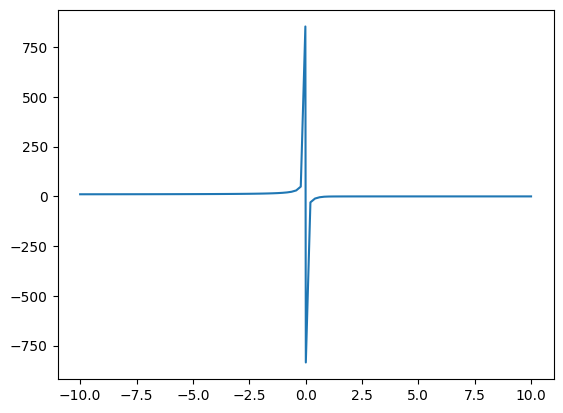

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the symbolic expressions into Python functions
PDE_p_isocline_func = sp.lambdify(cAMP, PDE_p_isocline[0], 'numpy')
cAMP_isocline_func = sp.lambdify(PDE_p, cAMP_isocline[0], 'numpy')

# Generate the data for the plot
negative_cAMP_range = np.linspace(-10, -0.01, 50)
positive_cAMP_range = np.linspace(0.01, 10, 50)
cAMP_range = np.concatenate((negative_cAMP_range, positive_cAMP_range))

negative_PDE_p_range = np.linspace(-10, -0.01, 50)
positive_PDE_p_range = np.linspace(0.01, 10, 50)
PDE_p_range = np.concatenate((negative_PDE_p_range, positive_PDE_p_range))

PDE_p_isocline_data = np.array(PDE_p_isocline_func(cAMP_range))

# Calculate cAMP isocline data separately for negative and positive PDE_p_range
cAMP_isocline_data_negative = np.array(cAMP_isocline_func(negative_PDE_p_range))
cAMP_isocline_data_positive = np.array(cAMP_isocline_func(positive_PDE_p_range))

# Plot the isoclines
plt.plot(cAMP_range, PDE_p_isocline_data, label='PDE_p isocline')
plt.plot(cAMP_isocline_data_negative, negative_PDE_p_range, label='cAMP isocline (negative PDE_p)')
plt.plot(cAMP_isocline_data_positive, positive_PDE_p_range, label='cAMP isocline (positive PDE_p)')

# Set plot labels and legend
plt.xlabel('cAMP')
plt.ylabel('PDE_p')
plt.legend()

# Show the plot
plt.show()


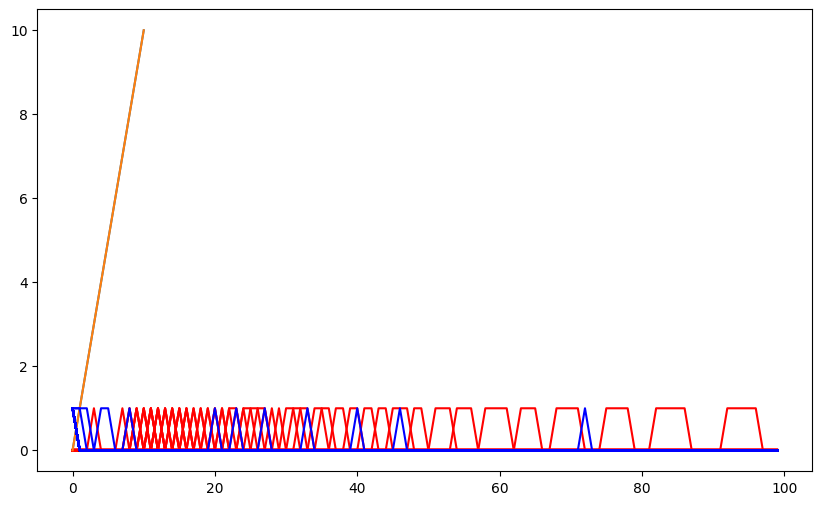

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

k1, k3, k2 = 9.18, 0.12, 10
r1, r2, r3, r4 = 2.04, 9.34, 0.56, 1.84
Km1, Km2, Km3, Km4 = 0.46, 9.34, 1.26, 0.18
Dt, ACt = 1.26, 10
PDEt, Et = 9.66, 2.04

def K1(Km1, AC_t):
    return Km1 / AC_t

def K2(Km2, AC_t):
    return Km2 / AC_t

def V1(r1, cAMP):
    return r1 * cAMP

def V2(r2, Dt):
    return r2 * Dt

def G(V1, V2, K1, K2):
    V1_over_V2 = V1 / V2
    numerator = (V1_over_V2 - 1) - K2 * (K1 / K2 + V1_over_V2) + np.sqrt((V1_over_V2 - 1 - K2 * (K1 / K2 + V1_over_V2))**2 + 4 * K2 * (V1_over_V2 - 1) * V1_over_V2)
    denominator = 2 * (V1_over_V2 - 1)
    return numerator / denominator

def dPDEp_dt(PDE_p, cAMP):
    return r3 * cAMP * (PDEt - PDE_p) / Km3 - r4 * Et * PDE_p / (Km4 + PDE_p)

def dcAMP_dt(AC_t, cAMP, PDE_p):
    return k1 * AC_t * G(V1(r1, cAMP), V2(r2, Dt), K1(Km1, AC_t), K2(Km2, AC_t)) - (k2 * PDE_p + k3) * cAMP

def system(Y, t):
    PDE_p, cAMP = Y
    return [dPDEp_dt(PDE_p, cAMP), dcAMP_dt(AC_t, cAMP, PDE_p)]

PDE_p_range = np.linspace(0, 10, 100)
cAMP_range = np.linspace(0, 10, 100)

PDE_p_grid, cAMP_grid = np.meshgrid(PDE_p_range, cAMP_range)

dPDEp_grid = dPDEp_dt(PDE_p_grid, cAMP_grid)
dcAMP_grid = dcAMP_dt(ACt, cAMP_grid, PDE_p_grid)

nullcline_PDE_p = np.isclose(dPDEp_grid, 0, atol=0.1)
nullcline_cAMP = np.isclose(dcAMP_grid, 0, atol=0.1)

plt.figure(figsize=(10, 6))
plt.plot(PDE_p_range, cAMP_range, nullcline_PDE_p, 'r-', label='d[PDE_p]/dt = 0')
plt.plot(PDE_p_range, cAMP_range, nullcline_cAMP, 'b-', label='d[cAMP]/dt = 0')
plt.show()


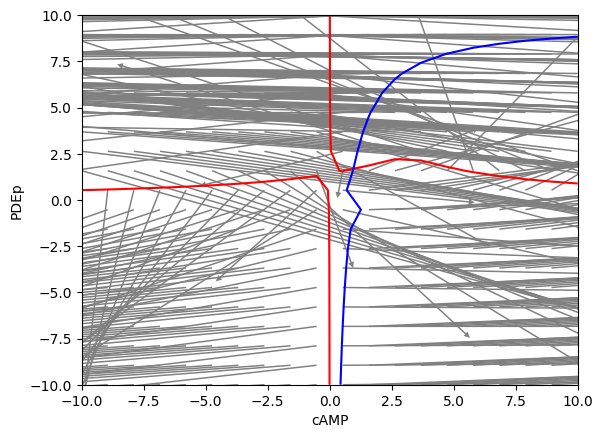

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def G(u, v, J, K):
    numerator = 2 * u * K
    den_1 = v - u + v * J + u * K
    den_2 = -4 * (v - u) * u * K
    radicand = den_1 ** 2 + den_2
    denominator = den_1 + np.sqrt(radicand)
    return numerator / denominator

def ACp(r1, cAMP, r2, Dt, Km1, Km2, ACt):
    return ACt * G(r1 * cAMP, r2 * Dt, Km1 / ACt, Km2 / ACt)

def dcAMP(k1, ACp, k3, k2, PDEp, cAMP):
    return (k1 * ACp) - (k3 + k2 * PDEp) * cAMP

def dPDEp(r3, cAMP, PDEt, PDEp, Km3, r4, Et, Km4):
    return r3 * cAMP * ((PDEt - PDEp) / Km3) - r4 * Et * PDEp / (Km4 + PDEp)

def f(cAMP, PDEp):
    return dcAMP(k1, ACp(r1, cAMP, r2, Dt, Km1, Km2, ACt), k3, k2, PDEp, cAMP)

def g(cAMP, PDEp):
    return dPDEp(r3, cAMP, PDEt, PDEp, Km3, r4, Et, Km4)

k1, k3, k2 = 9.18, 0.12, 10
r1, r2, r3, r4 = 2.04, 9.34, 0.56, 1.84
Km1, Km2, Km3, Km4 = 0.46, 9.34, 1.26, 0.18
Dt, ACt = 1.26, 10
PDEt, Et = 9.66, 2.04

cAMP_vals = np.linspace(-10, 10, 20)
PDEp_vals = np.linspace(-10, 10, 20)

cAMP_grid, PDEp_grid = np.meshgrid(cAMP_vals, PDEp_vals)

f_vals = f(cAMP_grid, PDEp_grid)
g_vals = g(cAMP_grid, PDEp_grid)

fig, ax = plt.subplots()
q = ax.quiver(cAMP_grid, PDEp_grid, f_vals, g_vals, angles='xy', scale_units='xy', scale=1, color='gray', headlength=4, headaxislength=4, headwidth=4)

cp_f = plt.contour(cAMP_grid, PDEp_grid, f_vals, levels=[0], colors='red', linestyles='solid')
cp_g = plt.contour(cAMP_grid, PDEp_grid, g_vals, levels=[0], colors='blue', linestyles='solid')

ax.set_xlabel('cAMP')
ax.set_ylabel('PDEp')
plt.show()


C:\Users\Petrb\AppData\Local\Temp\ipykernel_25280\1253487028.py:71: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend([h1[0], h2[0]], ['f nullcline', 'g nullcline'])


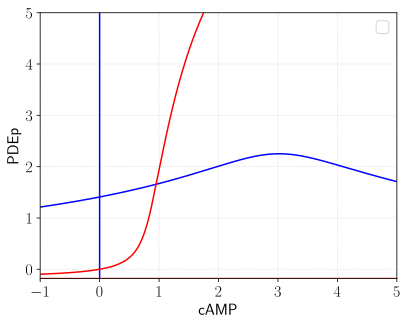

In [175]:
import numpy as np
import matplotlib.pyplot as plt

def G(u, v, J, K):
    return (2 * u * K) / (v - u + v * J + u * K + np.sqrt((v - u + v * J + u * K)**2 - 4 * (v - u) * u * K))

def ACp(r1, cAMP, r2, Dvalue, Km1, Km2, ACt):
    return ACt * G(r1 * cAMP, r2 * Dvalue, Km1 / ACt, Km2 / ACt)

def dPDEp(r3, cAMP, PDEt, PDEp, Km3, r4, Et, Km4):
    return r3 * cAMP * ((PDEt - PDEp) / Km3) - r4 * Et * PDEp / (Km4 + PDEp)

def dcAMP(k1, ACp, k3, k2, PDEp, cAMP):
    return k1 * ACp - (k3 + k2 * PDEp) * cAMP

k1 = 9.18
k3 = 0.12
k2 = 10
r1 = 2.04
r2 = 9.34
r3 = 0.56
r4 = 1.84
Km1 = 0.46
Km2 = 9.34
Km3 = 1.26
Km4 = 0.18
Dvalue = 1.26
ACt = 10
PDEt = 9.66
Et = 2.04

def f(cAMP, PDEp):
    return dcAMP(k1, ACp(r1, cAMP, r2, Dvalue, Km1, Km2, ACt), k3, k2, PDEp, cAMP)

def g(cAMP, PDEp):
    return dPDEp(r3, cAMP, PDEt, PDEp, Km3, r4, Et, Km4)

# Define the two ranges
#range1 = np.linspace(-5, 0, 500)
#range2 = np.linspace(0, 5, 500)

# Concatenate the two ranges
#cAMP_range = np.concatenate((range1, range2))

# Define the second range
#cAMP = np.linspace(0, 1, 10000)
#PDEp_range = np.linspace(-0.1, 10, 10000)

#range3 = np.linspace(-5, -0.01, 15000)
#range4 = np.linspace(0.01, 5, 15000)

#PDEp_range = np.concatenate((range3, range4))
#cAMP_grid, PDEp_grid = np.meshgrid(cAMP_range, PDEp_range)
cAMP_range = np.linspace(-5, 5, 10000)
PDEp_range = np.linspace(-1, 5, 10000)
cAMP_grid, PDEp_grid = np.meshgrid(cAMP_range, PDEp_range)

f_grid = f(cAMP_grid, PDEp_grid)
g_grid = g(cAMP_grid, PDEp_grid)

levels = np.linspace(-0.01, 0.01, 121)

f_nullcline = plt.contour(cAMP_grid, PDEp_grid, f_grid, levels=[0], colors='blue', linestyles=['solid'])
g_nullcline = plt.contour(cAMP_grid, PDEp_grid, g_grid, levels=[0], colors='red', linestyles=['solid'])

plt.xlabel('cAMP')
plt.ylabel('PDEp')
plt.grid(linestyle=':', color='lightgray')
h1 = f_nullcline.legend_elements()
h2 = g_nullcline.legend_elements()
plt.legend([h1[0], h2[0]], ['f nullcline', 'g nullcline'])
plt.ylim(-0.18, 5)
plt.xlim(-1, 5)
plt.show()

